<a href="https://colab.research.google.com/github/AnaCristina1972/projett/blob/master/Atividade_1_Modelos_introdut%C3%B3rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1

## Modelos Introdutórios

Neste *notebook* você deverá trabalhar com os modelos estudados até aqui:

- Árvore de decisão
- Naive Bayes
- k-NN

Para cada modelo você deverá:

- Fazer ajuste de hiperparâmetros usando um conjunto de treinamento e um conjunto de validação
- Testar o modelo usando um conjunto de treinamento e um conjunto de testes

### Passo 1: Importe as bibliotecas e carregue os dados

Vamos importar todas as bibliotecas e funções de uma vez:

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Use a função `pd.read_csv()` para carregar o arquivo de treinamento (`iris-treino.csv`).

Vamos trabalhar com os arquivos disponibilizados no ColabWeb.

In [73]:
treino = pd.read_csv("/content/iris-treino.csv")   # <-- complete o código

In [74]:
teste =pd.read_csv("/content/iris-teste.csv")   # <-- complete o código

Use a função `pd.read_csv()` para carregar o arquivo de teste (`iris-teste.csv`).

## Atributo

In [75]:
treino

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.2,3.4,5.4,2.3,virginica
1,5.1,3.3,1.7,0.5,setosa
2,6.7,2.5,5.8,1.8,virginica
3,5.6,2.5,3.9,1.1,versicolor
4,4.4,3.2,1.3,0.2,setosa
...,...,...,...,...,...
59,4.7,3.2,1.3,0.2,setosa
60,6.6,2.9,4.6,1.3,versicolor
61,6.4,3.2,4.5,1.5,versicolor
62,6.4,2.9,4.3,1.3,versicolor


### Classe

teste

### Passo 2: processamento da classe

A última coluna contém o conceito (o resultado correto do mapeamento).

O DataFrame contém strings para o conceito (nome da espécie). O scikit-learn requer que esse conceito seja composto por valores numéricos.

Use a classe `LabelEncoder` para transformar esses valores em numéricos.

In [76]:
treino_le = LabelEncoder()

Primeiro, use `fit` sobre o conjunto de treinamento para "aprender" o mapeamento de string para inteiro

In [77]:
treino_le.fit(treino.iloc[:, -1])

LabelEncoder()

# Agora, use `transform` para substituir as strings pelos valores numéricos. (**Observação**: dependendo da sua versão do Pandas, pode aparecer uma mensagem advertência na linha abaixo; ela pode ser ignorada)

In [78]:
treino.iloc[:, -1] = treino_le.transform(treino.iloc[:, -1])

<ipython-input-78-89af34ef116e>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  treino.iloc[:, -1] = treino_le.transform(treino.iloc[:, -1])


In [79]:
treino

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.2,3.4,5.4,2.3,2
1,5.1,3.3,1.7,0.5,0
2,6.7,2.5,5.8,1.8,2
3,5.6,2.5,3.9,1.1,1
4,4.4,3.2,1.3,0.2,0
...,...,...,...,...,...
59,4.7,3.2,1.3,0.2,0
60,6.6,2.9,4.6,1.3,1
61,6.4,3.2,4.5,1.5,1
62,6.4,2.9,4.3,1.3,1


Agora faça o mesmo com o teste.

In [80]:
teste_le=LabelEncoder()

In [81]:
teste_le.fit(teste.iloc[:, -1])#complete o código

LabelEncoder()

In [82]:
teste.iloc[:, -1] = teste_le.transform(teste.iloc[:, -1])

<ipython-input-82-9d42ab1ff2cd>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  teste.iloc[:, -1] = teste_le.transform(teste.iloc[:, -1])


In [83]:
teste


,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,3.8,6.7,2.2,2
1,6.3,3.3,6.0,2.5,2
2,7.2,3.2,6.0,1.8,2
3,7.0,3.2,4.7,1.4,1
4,6.8,2.8,4.8,1.4,1
...,...,...,...,...,...
81,5.6,3.0,4.1,1.3,1
82,6.0,2.2,5.0,1.5,2
83,6.3,3.4,5.6,2.4,2
84,7.1,3.0,5.9,2.1,2


### Passo 3: Treino e teste dos modelos

Usando os conhecimentos que você aprendeu nas aulas anteriores, treine e teste os modelos de árvore de decisão, Naive Bayes e k-NN.

Não faça nenhum ajuste de hiperparâmetros. Use as configurações *default* de cada uma das classes.

In [84]:
Xtreino=treino.iloc[:,: -1]

In [85]:
Xtreino

,sepal_length,sepal_width,petal_length,petal_width
0,6.2,3.4,5.4,2.3
1,5.1,3.3,1.7,0.5
2,6.7,2.5,5.8,1.8
3,5.6,2.5,3.9,1.1
4,4.4,3.2,1.3,0.2
...,...,...,...,...
59,4.7,3.2,1.3,0.2
60,6.6,2.9,4.6,1.3
61,6.4,3.2,4.5,1.5
62,6.4,2.9,4.3,1.3


In [86]:
ytreino=treino.iloc[:, -1]

In [87]:
ytreino

0     2
1     0
2     2
3     1
4     0
     ..
59    0
60    1
61    1
62    1
63    1
Name: species, Length: 64, dtype: int64

### Criando um arquivo

import pickle
with open('iris_treino.pkl','wb')as f:
    pickle.dump([Xtreino,ytreino],f)

In [88]:
Xtest = teste.iloc[:, :-1].values

In [89]:
Xtest

array([[7.7, 3.8, 6.7, 2.2],
       [6.3, 3.3, 6. , 2.5],
       [7.2, 3.2, 6. , 1.8],
       [7. , 3.2, 4.7, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [7.6, 3. , 6.6, 2.1],
       [5.9, 3.2, 4.8, 1.8],
       [5.8, 2.7, 3.9, 1.2],
       [5.1, 3.7, 1.5, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.9, 3.2, 5.7, 2.3],
       [5.7, 2.8, 4.1, 1.3],
       [4.5, 2.3, 1.3, 0.3],
       [5. , 3.5, 1.6, 0.6],
       [6.8, 3.2, 5.9, 2.3],
       [5.5, 2.5, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [6.1, 3. , 4.6, 1.4],
       [4.4, 2.9, 1.4, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.3, 2.9, 5.6, 1.8],
       [4.7, 3.2, 1.6, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [7.3, 2.9, 6.3, 1.8],
       [7.2, 3. , 5.8, 1.6],
       [6.3, 2.3, 4.4, 1.3],
       [6.3, 2.7, 4.9, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 2.8, 4.5, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [6.7, 3.1, 5.6, 2.4],
       [5.5, 2.3, 4. , 1.3],
       [4.4, 3

In [90]:
ytest=teste.iloc[:,-1]

In [91]:
ytest

0     2
1     2
2     2
3     1
4     1
     ..
81    1
82    2
83    2
84    2
85    2
Name: species, Length: 86, dtype: int64

 # **Modelos Default**

##**Arvore de Decisão**

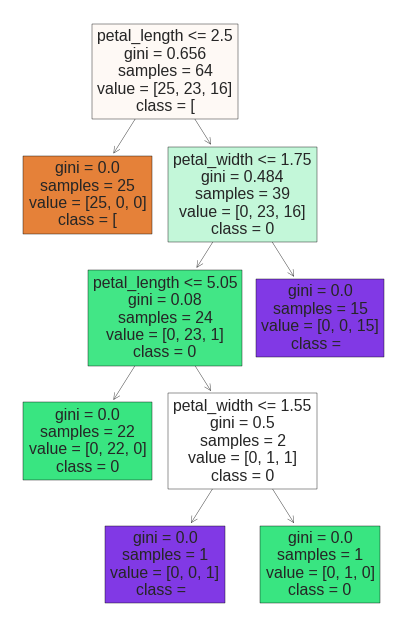

In [92]:
clf = DecisionTreeClassifier()
clf.fit(Xtreino,ytreino);
previsores=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
fig,exes=plt.subplots(nrows=1, ncols=1, figsize=(5,8))
tree.plot_tree(clf, feature_names=previsores,class_names=str(clf.classes_), filled=True);
fig.savefig('Arvore_1.png')

In [93]:
ypred=clf.predict(Xtest)
ac=accuracy_score(ytest,ypred)
ac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9534883720930233

## **KNN**

In [94]:
knn_treino=KNeighborsClassifier()
knn_treino.fit(Xtreino,ytreino)
ypred=knn_treino.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [95]:
ac=accuracy_score(ytest,ypred)
ac

0.9651162790697675

## **Naive Bayes**

In [96]:
GNB=GaussianNB()
GNB.fit(Xtreino,ytreino)
ypredNB=GNB.predict(Xtest)
GNB.score(Xtreino, ytreino)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.96875

In [97]:
ac=accuracy_score(ytest,ypred)
ac

0.9651162790697675

### Passo 3,5: Verificação do *notebook*

Para a próxima atividade você precisará que as variáveis `treino` e `teste` estejam da forma como ela foi carregada. Execute a célula abaixo e, se qualquer um dos testes falhar, faça novamente os passos 1 e 2.

In [98]:
if treino.shape != (64, 5):print("O número de linhas ou colunas do treino está errado.")
if teste.shape != (86, 5): print("O número de linhas ou colunas do teste está errado.")

if treino.iloc[:,-1].dtype != int: print('A última coluna do treino não é numérica.')
if teste.iloc[:,-1].dtype != int: print('A última coluna do teste não é numérica.')

soma_treino = np.array([365.9, 198.7, 221.4,  69.2,  55. ])
soma_teste = np.array([510.6, 259.9, 342.3, 110.7,  95. ])

if (np.abs(treino.sum() - soma_treino) > 0.1).any(): print('Existem valores incorretos na tabela de treino.')
if (np.abs(teste.sum() - soma_teste) > 0.1).any(): print('Existem valores incorretos na tabela de teste.')

### Passo 4: Ajuste de hiperparâmetros

Agora vamos verificar se é possível ajustar os hiperparâmetros de acordo com um conjunto de validação.

A ideia é simples, vamos dividir o conjunto de treino em um **novo conjunto de treino** e um conjunto de validação. Podemos fazer isso utilizando a função `train_test_split`.

In [99]:
X_train, X_val, y_train, y_val = train_test_split(treino.iloc[:, :-1], treino.iloc[:, -1],
                                                    random_state=42, test_size=0.3, stratify=treino.iloc[:, -1])

#### Árvore de Decisão

Teste diferentes configurações da árvore de decisão com o conjunto de validação.

1) Verifique se o desempenho do modelo usa quando o critério é alterado para `criterion='entropy'`.

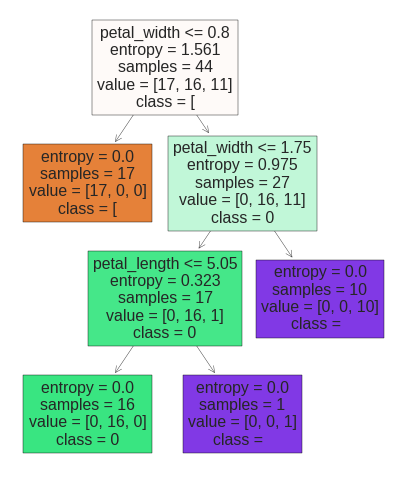

In [100]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train);
previsores=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
fig,exes=plt.subplots(nrows=1, ncols=1, figsize=(5,6))
tree.plot_tree(clf, feature_names=previsores,class_names=str(clf.classes_), filled=True);
fig.savefig('Arvore_1.png')
# Continue o código para treinar a árvore com (X_train, y_train) e testar a árvore com (X_val, y_val)

In [101]:
ypred=clf.predict(X_val)

In [102]:
ypred

array([2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2])

In [103]:
ac=accuracy_score(y_val,ypred)
ac

0.95

2) Verifique se o desempenho do modelo usa quando especificamos uma altura máxima para a árvore. Para especificar a altura máxima da árvore, use o argumento `max_depth=ALTURA` quando for instanciar o objeto da classe `DecisionTreeClassifier`.

Altura  5  e acuracia de  0.95
Altura  7  e acuracia de  0.95
Altura  9  e acuracia de  0.95
Altura  11  e acuracia de  0.95
Altura  13  e acuracia de  0.95
Altura  15  e acuracia de  0.95
Altura  17  e acuracia de  0.95
Altura  19  e acuracia de  0.95
Altura  21  e acuracia de  0.95
Altura  23  e acuracia de  0.95


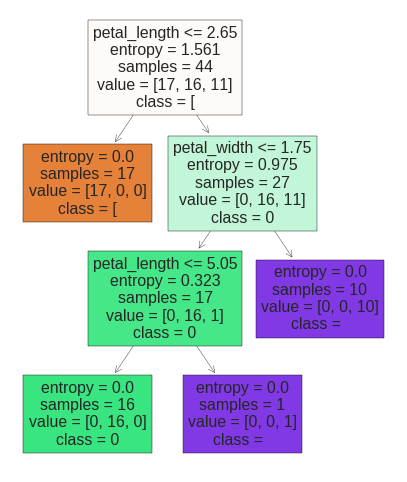

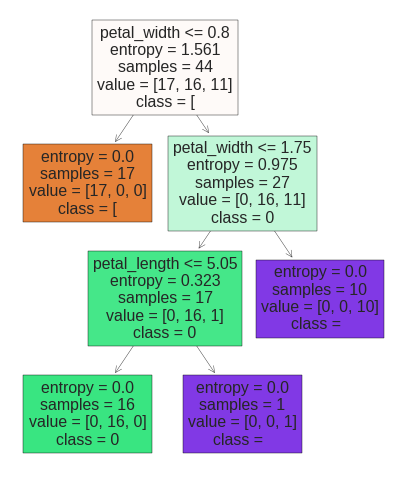

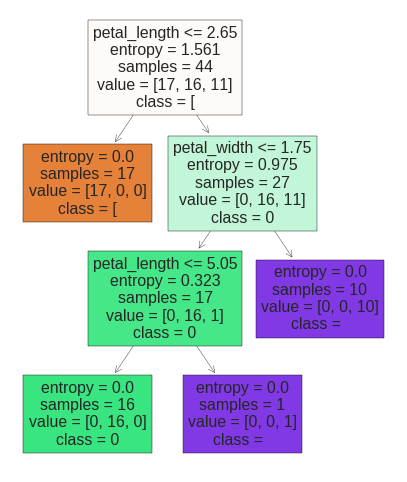

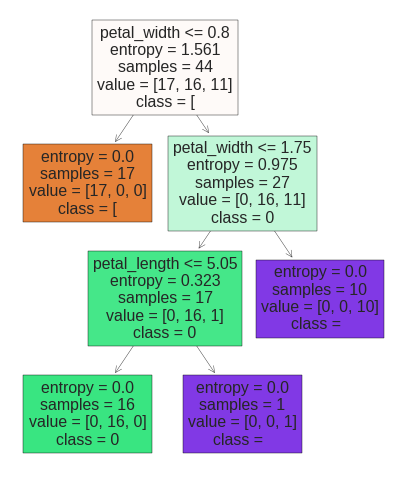

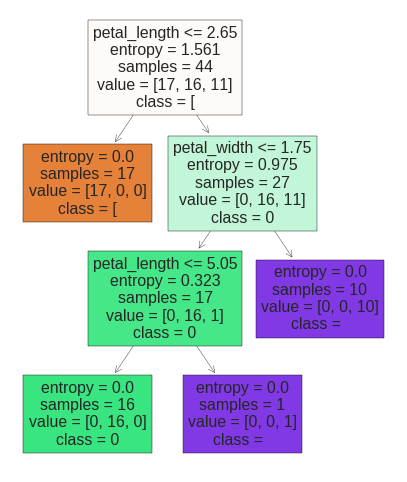

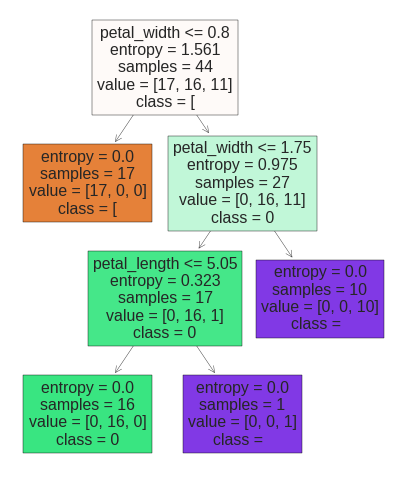

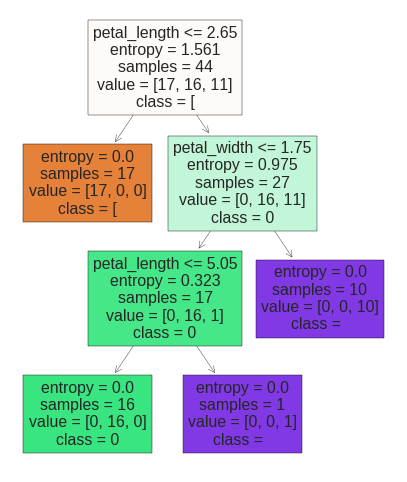

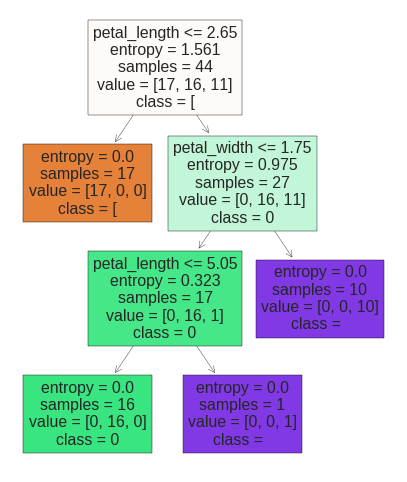

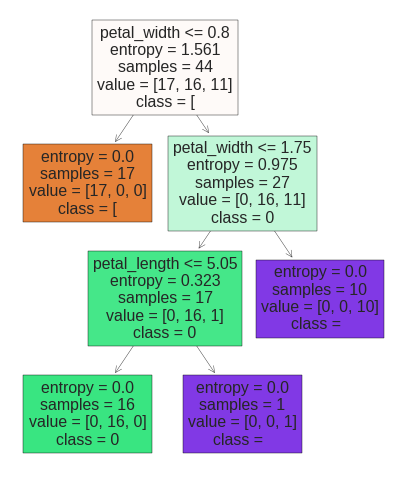

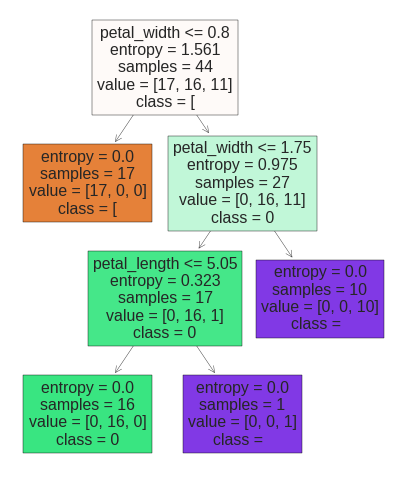

In [104]:
ALTURA = 5
listAcura =[]
listAltura =[]
erro=[]

for i in range(10):

  clf = DecisionTreeClassifier(criterion='entropy',max_depth = ALTURA)
  clf.fit(X_train,y_train);
  previsores=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
  fig,exes=plt.subplots(nrows=1, ncols=1, figsize=(5,6))
  plot_tree(clf, feature_names=previsores,class_names=str(clf.classes_), filled=True);
  ypred=clf.predict(X_val)
  acscore=accuracy_score(y_val,ypred)
  er=1-acscore
  erro.append(er)
  listAcura.append(acscore)
  listAltura.append(ALTURA)
  print ("Altura ",ALTURA," e acuracia de ", acscore)
  print ("="*20)
  ALTURA = ALTURA + 2

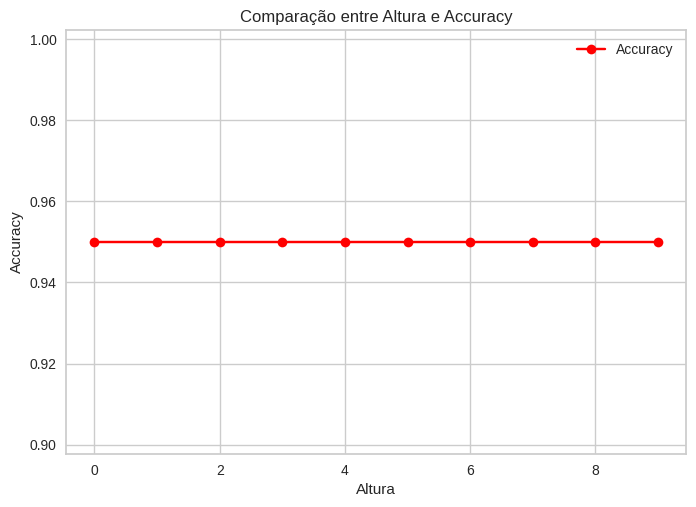

In [105]:
plt.plot(listAcura, label='Accuracy', color='red', marker='o')
plt.xlabel('Altura')
plt.ylabel('Accuracy')
plt.title('Comparação entre Altura e Accuracy')
plt.legend()
plt.show()

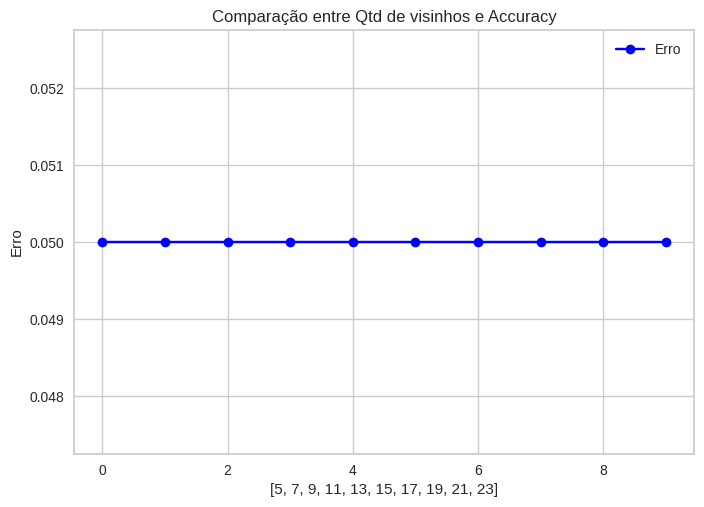

In [106]:
plt.plot(erro, label='Erro', color='blue', marker='o')
plt.ylabel('Erro')
plt.xlabel(listAltura)

plt.title('Comparação entre Qtd de visinhos e Accuracy')
plt.legend()
plt.show()

#### Naive Bayes

O Naive Bayes gaussiano não tem nenhum hiperparâmetro para ajustarmos neste momento.

Apenas verifique o desempenho do modelo no conjunto de validação.

X_train, X_val, y_train, y_val

In [107]:
GNB=GaussianNB()

In [108]:
GNB.fit(X_train,y_train)

GaussianNB()

In [109]:
ypred=GNB.predict(X_val)

In [110]:
ypred

array([2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2])

In [111]:
accuracy_score(y_val,ypred)

1.0

#### k-NN

Teste diferentes configurações do modelo de vizinhança com o conjunto de validação.


1) Experimente trocar a função de distância. Para isso, especifique um valor para o parâmetro `metric`. Por exemplo, `metric='euclidean'` utiliza a distância euclidiana, enquanto `metric='manhattan'` utiliza a distância Manhattan. Veja a documentação para uma lista de nomes de métricas: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

## Teste com metric 'euclidean'




In [112]:
knn_treino=KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [113]:
knn_treino.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [114]:
ypred = knn_treino.predict(X_val)

In [115]:
ypred

array([2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2])

In [116]:
accuracy_score(y_val,ypred)

0.95

## Teste com metric 'manhattan'

In [117]:
knn_treino=KNeighborsClassifier(n_neighbors=5, metric='manhattan')

In [118]:
knn_treino.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [119]:
ypred=knn_treino.predict(X_val)

In [120]:
accuracy_score(y_val,ypred)

0.95

2. Verifique o desempenho do modelo com diferentes números de vizinhos. Utilize o parâmetro `n_neighbors=NUMERO`. Você pode fazer um laço de repetição de 1 até 10, por exemplo, para facilmente verificar a quantidade de vizinhos.

Com 1 Vizinhos a acurácia eh 1.0
Com 2 Vizinhos a acurácia eh 1.0
Com 3 Vizinhos a acurácia eh 0.95
Com 4 Vizinhos a acurácia eh 0.95
Com 5 Vizinhos a acurácia eh 0.95
Com 6 Vizinhos a acurácia eh 0.95
Com 7 Vizinhos a acurácia eh 0.95
Com 8 Vizinhos a acurácia eh 0.95
Com 9 Vizinhos a acurácia eh 0.95


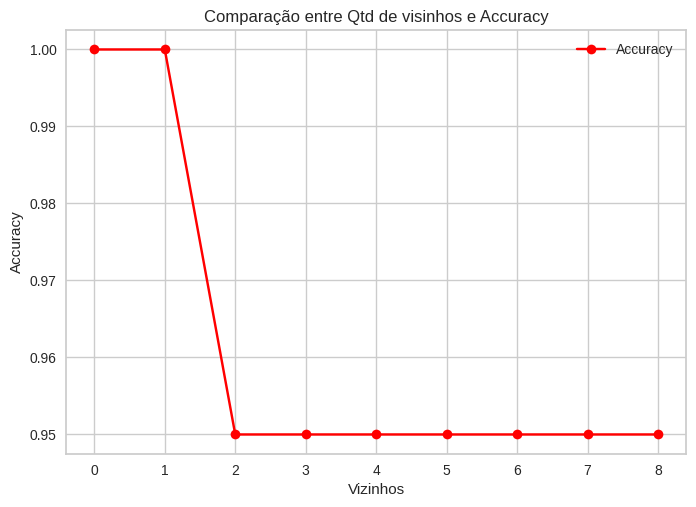

In [121]:
NUMERO = int (1)
listAcura =[]
listVizinho =[]
erro=[]
for i in range (9):
  knn_treino=KNeighborsClassifier(n_neighbors=(NUMERO), metric='manhattan')
  knn_treino.fit(Xtreino,ytreino)
  ypred=knn_treino.predict(X_val)
  ac = accuracy_score(y_val,ypred)
  er=1-ac
  erro.append(er)
  listAcura.append(ac)
  listVizinho.append(NUMERO)
  print("Com",NUMERO,"Vizinhos a acurácia eh",ac)
  NUMERO=NUMERO+1

plt.plot(listAcura, label='Accuracy', color='red', marker='o')
plt.xlabel('Vizinhos')
plt.ylabel('Accuracy')
plt.title('Comparação entre Qtd de visinhos e Accuracy')
plt.legend()
plt.show()


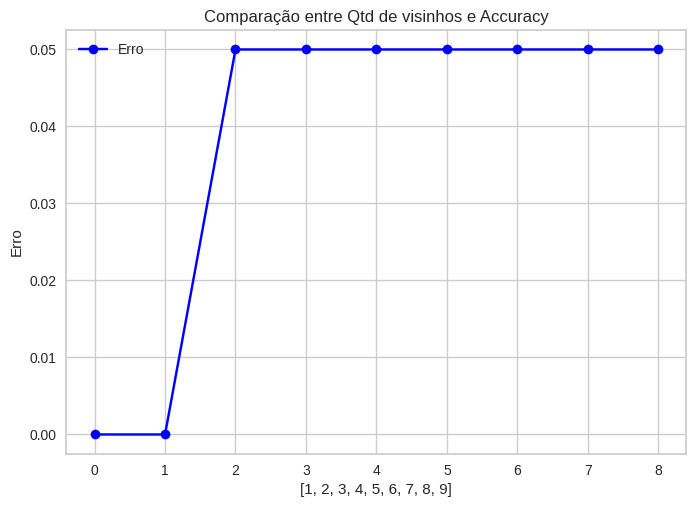

In [122]:
plt.plot(erro, label='Erro', color='blue', marker='o')
plt.ylabel('Erro')
plt.xlabel(listVizinho)
plt.title('Comparação entre Qtd de visinhos e Accuracy')
plt.legend()
plt.show()

Com 1 Vizinhos a acurácia eh 1.0
Com 2 Vizinhos a acurácia eh 1.0
Com 3 Vizinhos a acurácia eh 0.95
Com 4 Vizinhos a acurácia eh 0.95
Com 5 Vizinhos a acurácia eh 0.95
Com 6 Vizinhos a acurácia eh 0.95
Com 7 Vizinhos a acurácia eh 0.95
Com 8 Vizinhos a acurácia eh 0.95
Com 9 Vizinhos a acurácia eh 0.95


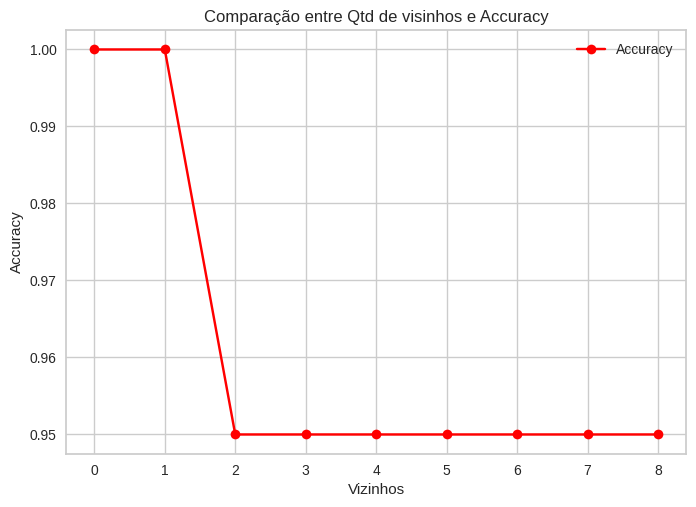

In [123]:
NUMERO = int (1)
listAcura =[]
listVizinho =[]
erro=[]
for i in range (9):
  knn_treino=KNeighborsClassifier(n_neighbors=(NUMERO), metric='euclidean')
  knn_treino.fit(Xtreino,ytreino)
  ypred=knn_treino.predict(X_val)
  ac = accuracy_score(y_val,ypred)
  er=1-ac
  erro.append(er)
  listAcura.append(ac)
  listVizinho.append(NUMERO)
  print("Com",NUMERO,"Vizinhos a acurácia eh",ac)
  NUMERO=NUMERO+1

plt.plot(listAcura, label='Accuracy', color='red', marker='o')
plt.xlabel('Vizinhos')
plt.ylabel('Accuracy')
plt.title('Comparação entre Qtd de visinhos e Accuracy')
plt.legend()
plt.show()

### Passo 5: Considerações

1) Qual foi a melhor configuração para a árvore de decisão que você entrou no passo 4? Isto é, quais foram os valores de `criterion` e `max_depth` que produziram o melhor resultado no conjunto de validação?

Na configuração da árvore de decisão analisada no passo 4, entre as diferentes configurações testadas, aquela em que definimos a profundidade máxima (max_depth) da árvore de decisão como 5 obteve a melhor acurácia no conjunto de validação. Essa escolha sugere que conseguimos equilibrar a complexidade da árvore com sua capacidade de se adaptar a novos dados. Optar por uma profundidade maior poderia resultar em "sobreajuste", fazendo com que a árvore se ajustasse demais aos dados de treinamento, mas tivesse dificuldades para lidar com novos dados. Assim, escolher max_depth igual a 5 foi uma decisão para garantir que o modelo fosse preciso e capaz de generalizar bem para diferentes situações.              

2) Qual foi a melhor configuração para o k-NN que você entrou no passo 4? Isto é, quais foram os valores de `metric` e `n_neighbors` que produziram o melhor resultado no conjunto de validação?

Na análise do k-NN realizada no passo 4, a análise dos resultados para o algoritmo k-NN revela que a melhor configuração foi obtida com a métrica euclidiana e um número de vizinhos igual a 1. Utilizando um loop para testar o número de vizinhos de 1 a 10, a acurácia atingiu 1.0 para 1 e 2 vizinhos, mantendo-se em 0.95 para 3 a 9 vizinhos. Este resultado indica que a classificação tornou-se mais precisa quando consideramos a proximidade imediata de um vizinho.

Por outro lado, ao utilizar a métrica Manhattan, os resultados foram semelhantes, alcançando acurácia máxima de 1.0 para 1 e 2 vizinhos, e 0.95 para 3 a 9 vizinhos. Isso sugere que, embora as métricas euclidiana e Manhattan tenham proporcionado desempenhos bastante similares, a métrica euclidiana com 1 vizinho foi a configuração que produziu o melhor resultado, proporcionando um modelo mais ajustado aos dados de validação.

3) Dentre os 3 modelos que você refinou no passo 4, qual teve melhor desempenho no conjunto de validação?

Ao comparar os resultados, vemos que o Naive Bayes obteve uma acurácia perfeita de 1.0, o que significa que classificou corretamente todas as instâncias do conjunto de dados. Em comparação, tanto a árvore de decisão quanto o k-NN alcançaram acurácias altas, mas não atingiram a perfeição.

Assim, considerando apenas a acurácia, o Naive Bayes parece ser o modelo mais eficaz para este conjunto de dados específico.

### Passo 6: Treino final

Agora que você encontrou a melhor configuração de cada modelo, faça o treinamento usando todos os exemplos de treino. A linha célula abaixo irá obter para você as matrizes de treino e teste.

In [124]:
X_train, y_train = treino.iloc[:, :-1], treino.iloc[:, -1]
X_test, y_test = teste.iloc[:, :-1], teste.iloc[:, -1]

1) Treine e teste a melhor configuração de árvore de decisão que você encontrou no passo 4

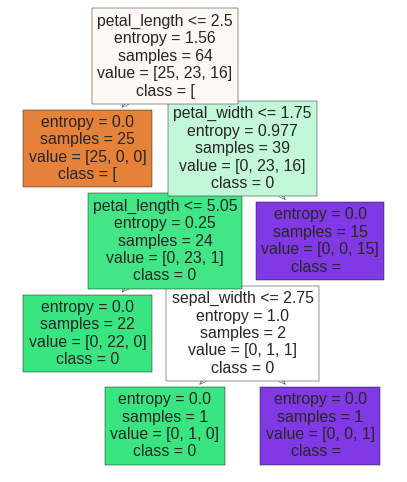

In [131]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train,y_train);
previsores=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
fig,exes=plt.subplots(nrows=1, ncols=1, figsize=(5,6))
tree.plot_tree(clf, feature_names=previsores,class_names=str(clf.classes_), filled=True);

In [132]:
ypred=clf.predict(X_test)
ac=accuracy_score(y_test,ypred)
ac

0.9534883720930233

2) Treine e teste novamente o Naive Bayes, do mesmo jeito que você fez no passo 3 (pode copiar e colar a célula anterior)

In [133]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)
ypred=GNB.predict(X_test)
ypred

array([2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0,
       2, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0,
       0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2])

In [134]:
accuracy_score(y_test,ypred)

0.9534883720930233

3) Treine e teste a melhor configuração de k-NN que você encontrou no passo 4

In [135]:
knn_treino=KNeighborsClassifier( n_neighbors=9, metric='euclidean' )
knn_treino.fit(Xtreino,ytreino)
ypred=knn_treino.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [136]:
ac=accuracy_score(ytest,ypred)
ac

0.9767441860465116

### Passo 7: Conclusões

O modelo que parecia o melhor no conjunto de validaç? E qual seria a melhor configuração de hiperparâmetros? Houve diferença significativa no ajuste de hiperparâmetros? Escreva aqui o que você aprendeu com este exercício.

Observe que, como o conjunto `iris` é pequeno, pode ser que muitas configurações tenham desempenho parecido ou que a configuração padrão seja a ideal. Mas o procedimento que você aprendeu aqui será o mesmo para seus experimentos futuros!

Ao analisar os modelos no treino e teste, percebemos que a Árvore de Decisão, configurada com criterion='entropy' e max_depth=5, teve uma acurácia de 0.9534883720930233 no teste, mostrando que se saiu bem em prever novos dados. De forma surpreendente, tanto o Naive Bayes quanto o k-NN também conseguiram uma acurácia de 0.9767441860465116 no teste, mostrando que mantiveram o desempenho visto na validação.

Na validação, Árvore de Decisão e Naive Bayes tiveram desempenho similar, ambos com acurácia de 0.9651. A melhor configuração para a Árvore de Decisão foi criterion='entropy' e max_depth=5, enquanto o Naive Bayes, teve a configurações padrão. Já o k-NN atingiu seu melhor resultado com n_neighbors=9 e metric='euclidean'.

Esses resultados destacam a importância de ajustar configurações, mesmo em conjuntos pequenos. A consistência entre validação e teste mostra que os modelos conseguiram generalizar bem. Este exercício é uma base sólida para futuras análises, mostrando como o ajuste de configurações é muito importante para otimizar o desempenho dos modelos em diferentes situações.